## **Mobile Phone Price Prediction and Clustering**

Team Members:
1. Megan Rochella - 0706022210028
2. Richard Alberto - 0706022210024

## **Introduction**
In today's highly competitive mobile phone market, companies need to adopt data-driven approaches to succeed. Bob, an entrepreneur who has recently launched his own mobile company, aims to establish a competitive edge by pricing his products strategically. However, determining a suitable price range for mobile phones based on their features can be challenging.

This project leverages machine learning to classify mobile phones into different price ranges based on their specifications, such as RAM, internal memory, battery power, and camera quality. By analyzing the relationship between these features and price categories, Bob can make informed decisions to compete with established brands like Apple and Samsung.

In addition to classification, clustering techniques will be applied to uncover natural groupings in the data, offering further insights into market segmentation. This project serves as a comprehensive exploration of how machine learning can empower businesses to thrive in competitive environments.

## **Metadata**

Dataset Overview: The dataset contains specifications of mobile phones, such as hardware features, network capabilities, and usability metrics, along with their price range classification.

Attributes:
- battery_power: Total battery capacity in mAh.
- blue: Bluetooth capability (0: No, 1: Yes).
- clock_speed: Processing speed in GHz.
- dual_sim: Dual SIM support (0: No, 1: Yes).
- fc: Front camera megapixels.
- four_g: 4G network support (0: No, 1: Yes).
- int_memory: Internal memory capacity in GB.
- m_dep: Mobile depth in cm.
- mobile_wt: Weight of the mobile phone in grams.
- n_cores: Number of cores in the processor.
- pc: Primary camera megapixels.
- px_height: Height of the screen resolution in pixels.
- px_width: Width of the screen resolution in pixels.
- ram: RAM capacity in MB.
- sc_h: Screen height in cm.
- sc_w: Screen width in cm.
- talk_time: Maximum talk time in hours.
- three_g: 3G network support (0: No, 1: Yes).
- touch_screen: Touchscreen availability (0: No, 1: Yes).
- wifi: WiFi capability (0: No, 1: Yes).
- price_range: Price category (0: Low, 1: Medium, 2: High, 3: Very High).

## Load Library

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime

# Import necessary libraries for data processing to modelling

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Cleaning & Data Preparation

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/Mobile%20Price%20Dataset%20Train.csv')

# Show top 5 rows of the data
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.describe()

# This table is often used in data analysis to get a quick overview of the distribution of data in a dataset
# The dataset covers a wide range of smartphone features and price categories, from budget phones with basic features (low RAM, lower clock speed, no touchscreen) to premium models (high RAM, 4G, and advanced cameras)
# Battery power, internal memory, and RAM are strong differentiators for more premium models
# The inclusion of features like 4G connectivity, touchscreen, Wi-Fi, and number of cores indicates that modern smartphones tend to offer these features, though some budget models still lack them
# Price range is likely strongly correlated with these features, with higher-end phones having better specifications, like higher RAM, better cameras, and faster processors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.info()

# We can see that the total rows are 2000 entries and total columns are 21
# The data types are int64 (19) and float64 (2)
# There is no null value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check for null values in the dataset
df.isnull().sum()

# As we can see, there is no null values in the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
# Check for unique values in the dataset
columns_to_check = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep',
                    'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
                    'three_g', 'touch_screen', 'wifi', 'price_range']

for column in columns_to_check:
    print(f"Unique values in '{column}': {df[column].unique()}")

# The dataset contains a mix of categorical variables (binary or multi-level) and continuous variables
# The categorical columns are mainly binary indicators of features such as Bluetooth, dual SIM, 4G, and Wi-Fi, as well as the price range which is a discrete categorical variable
# The continuous columns include various technical specifications like battery power, clock speed, internal memory, RAM, camera resolutions, and screen dimensions

Unique values in 'battery_power': [ 842 1021  563 ... 1139 1467  858]
Unique values in 'blue': [0 1]
Unique values in 'clock_speed': [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values in 'dual_sim': [0 1]
Unique values in 'fc': [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values in 'four_g': [0 1]
Unique values in 'int_memory': [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values in 'm_dep': [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values in 'mobile_wt': [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


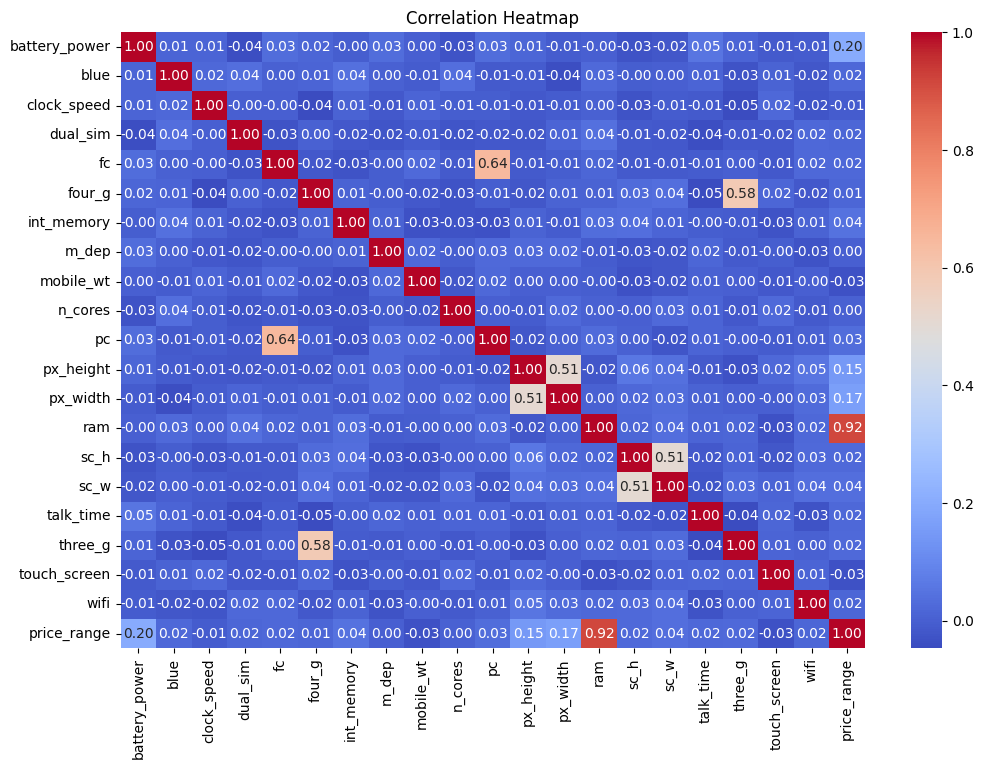

In [ ]:
# Visualization 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()
# ram and price_range have a high positive correlation (0.92), indicating that higher RAM is strongly associated with higher price ranges
# pc (primary camera) and fc (front camera) also show a moderate positive correlation (0.64)
# three_g and four_g have a moderate correlation (0.58), suggesting a link between devices supporting 3G and 4G technologies
# px_height and px_width have a moderate correlation (0.51), showing that devices with higher pixel height tend to have higher pixel width
# Most other variables have very weak or negligible correlations with one another, as their coefficients are close to 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


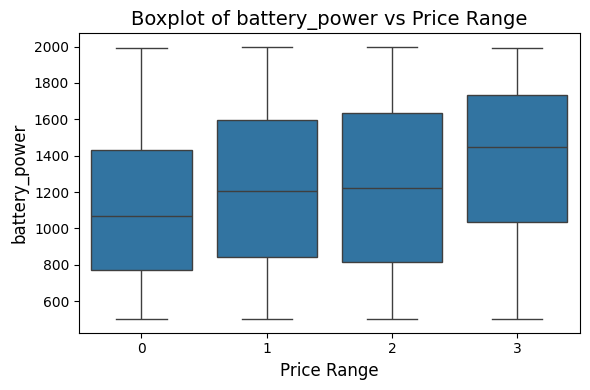

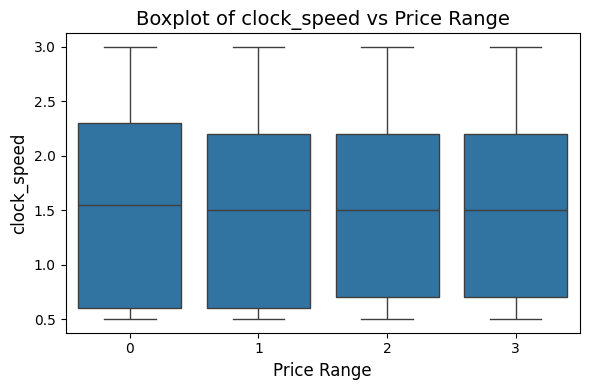

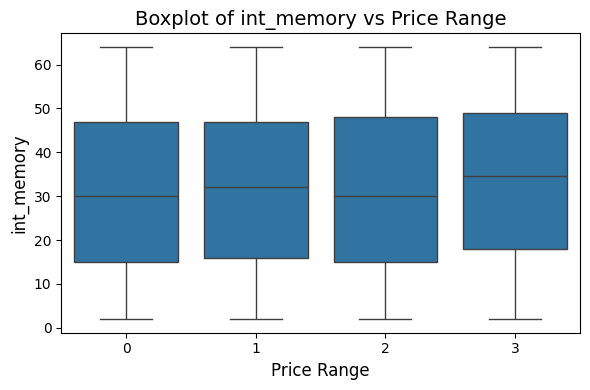

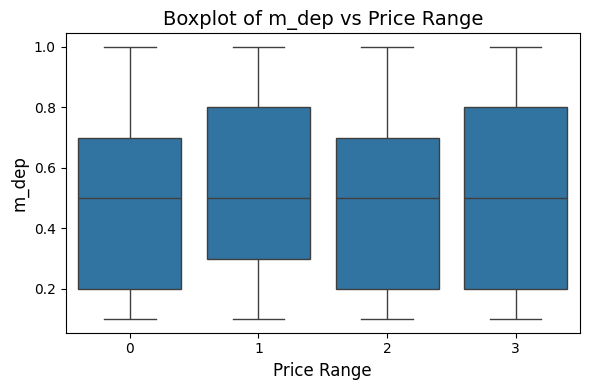

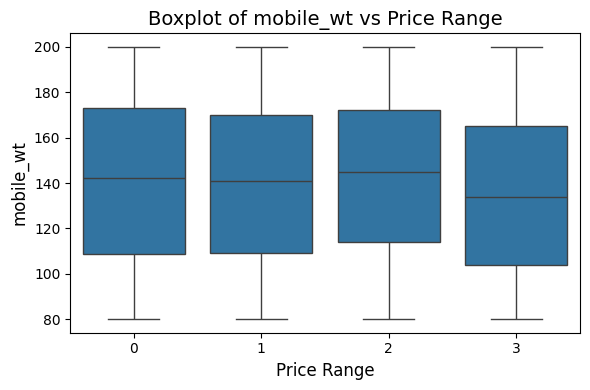

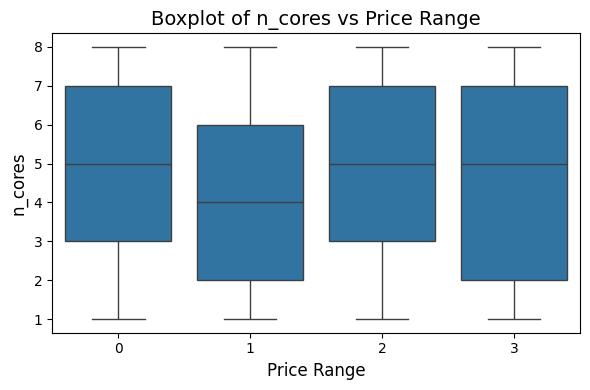

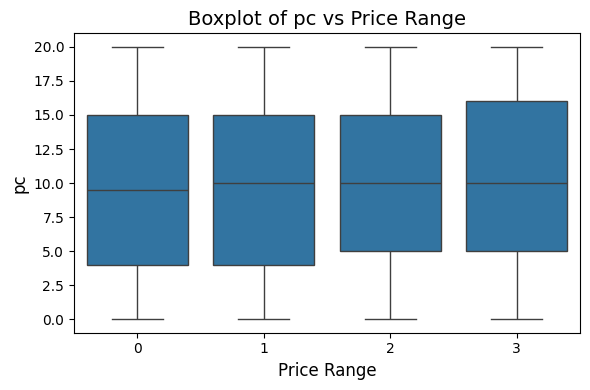

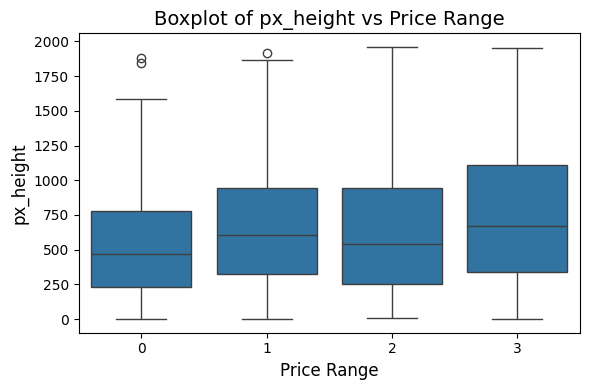

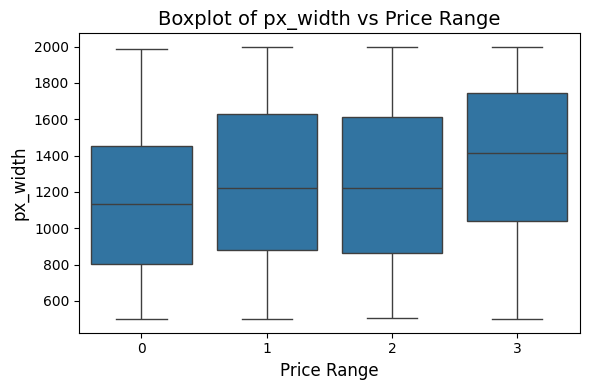

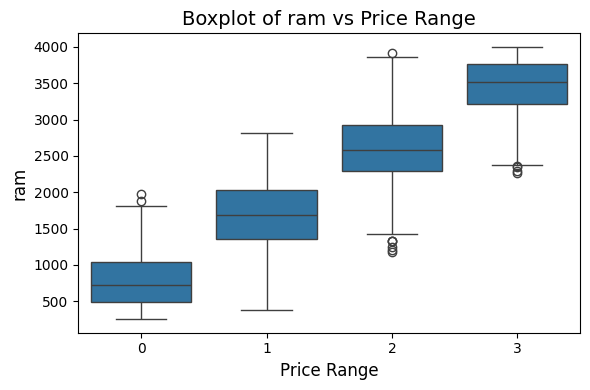

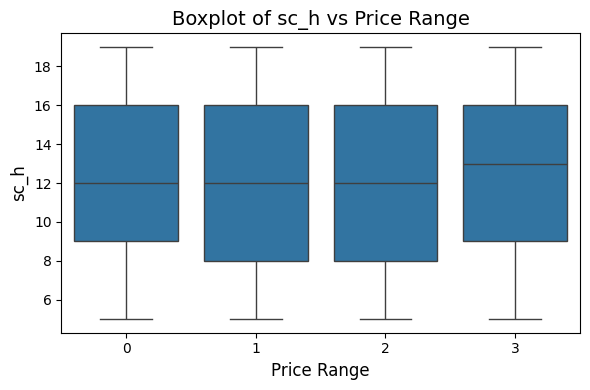

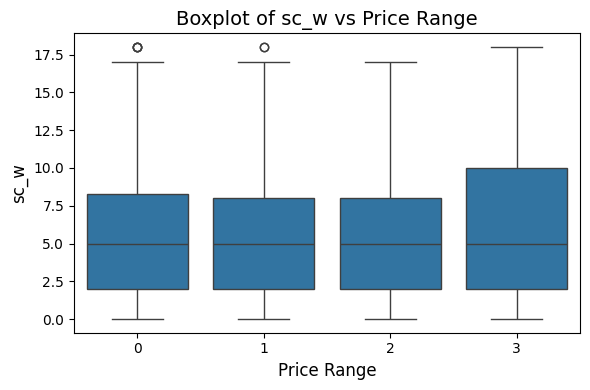

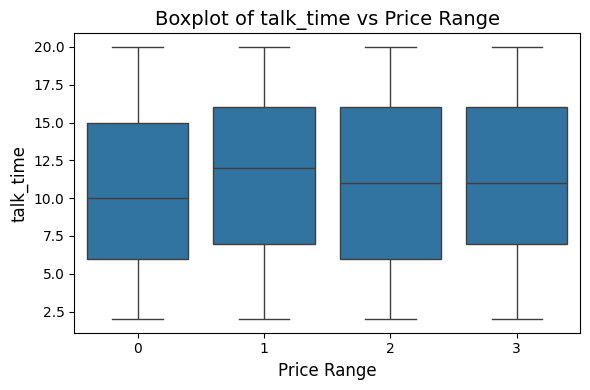

In [ ]:
# Visualizaiton 2. Boxplot of Numerical Features vs. Price Range

numerical_features = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='price_range', y=feature, data=df)
    plt.title(f"Boxplot of {feature} vs Price Range", fontsize=14)
    plt.xlabel("Price Range", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


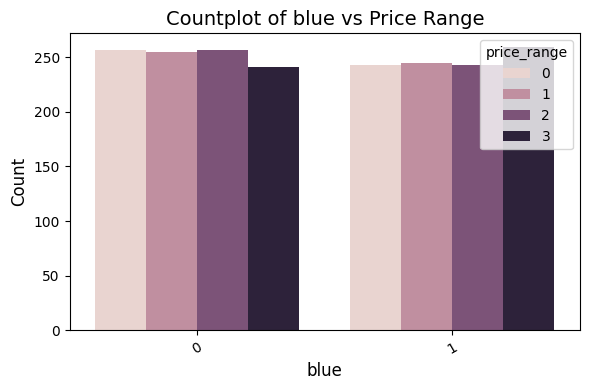

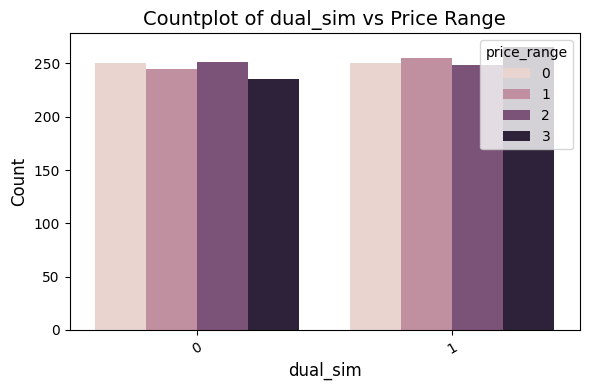

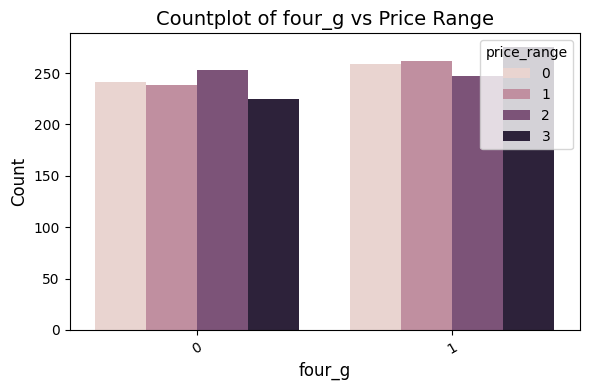

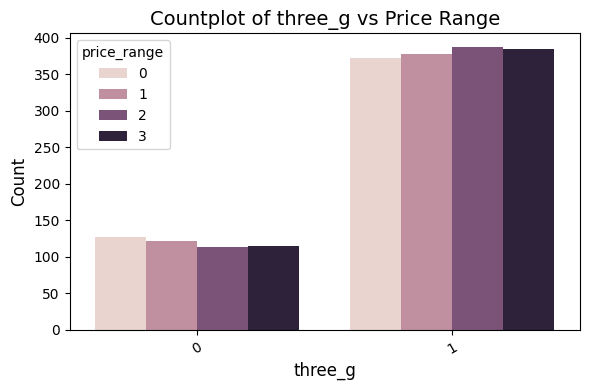

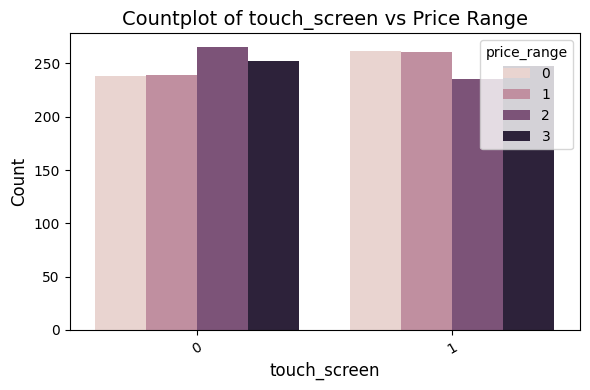

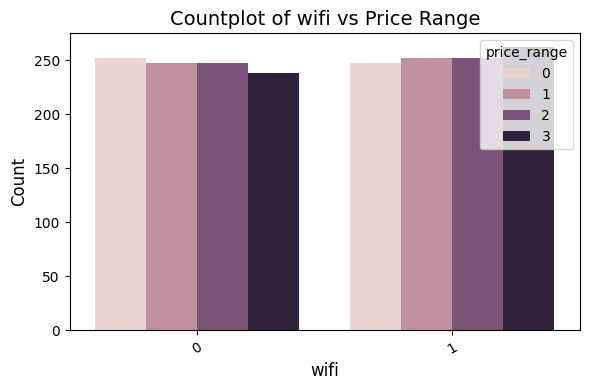

In [ ]:
# Visualization 3. Countplot of Categorical Features vs. Price Range

categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='price_range', data=df)
    plt.title(f"Countplot of {feature} vs Price Range", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30, fontsize=10)
    plt.tight_layout()
    plt.show()

## Machine Learning (Split Data)

In [ ]:
X = df.drop(['price_range', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], axis = 1)
# Dropping unnecessary columns

y = df['price_range']
# Target variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from imblearn.combine import SMOTEENN

# SMOTEENN for handling class imbalance
smote_enn = SMOTEENN(random_state=0)
X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

Class distribution after SMOTEEN:
price_range
0    434
3    417
1    372
2    347
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((1256, 5), (314, 5))

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scalling data
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Show top 5 rows of the data
df_scaled.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214


In [ ]:
# Show top 5 rows of the data
df_scaled.describe()

# Show count, mean, standard deviation, min, max and the quartiles of the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,...,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17,0.000000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,...,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00,-1.341641
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,...,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00,-0.670820
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,...,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01,0.000000
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,...,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01,0.670820
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,...,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01,1.341641


## **1. Classification**

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_train_logreg = logreg.predict(X_train_scaled)

# Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9904458598726115


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Accuracy calculation
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
training_accuracy_logreg = accuracy_score(y_train, y_train_logreg)

# Printing the results
print(f"Logistic Regression Testing accuracy: {test_accuracy_logreg:.4f}")
print(f"Logistic Regression Training accuracy: {training_accuracy_logreg:.4f}")
# The margin is less than 1%, so we conclude that the model is well-fitted

Logistic Regression Testing accuracy: 0.9904
Logistic Regression Training accuracy: 0.9952


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


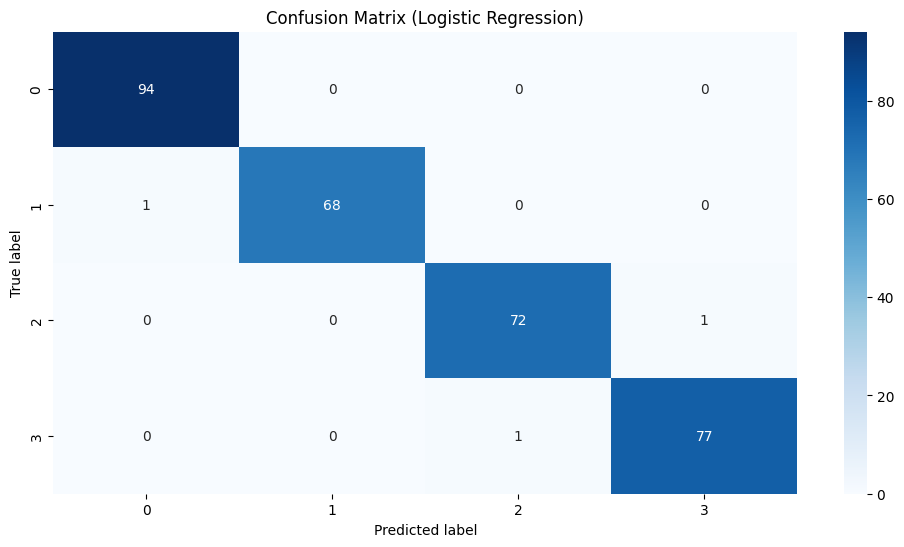

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(12,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of logistic regression results in 311 right predcitions out of 314 datas

In [ ]:
class_report_logreg = classification_report(y_test, y_pred_logreg)

print("Classification Report Logistic Regression: \n", class_report_logreg)
# Classification report of the random forest
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        94
           1       1.00      0.99      0.99        69
           2       0.99      0.99      0.99        73
           3       0.99      0.99      0.99        78

    accuracy                           0.99       314
   macro avg       0.99      0.99      0.99       314
weighted avg       0.99      0.99      0.99       314



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Conclusion from the Classification Report (Logistic Regression):**
- The Logistic Regression model performed exceptionally well, achieving an overall accuracy of 99%. The precision, recall, and F1-scores for all classes are consistently high, indicating that the model effectively identifies instances across all categories without significant bias. The macro and weighted averages also confirm the model's robustness and balance in handling the dataset.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_train_rf = rf.predict(X_train_scaled)

# Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9777070063694268


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Accuracy calculation
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
training_accuracy_rf = accuracy_score(y_train, y_train_rf)

# Printing the results
print(f"Random Forest Testing accuracy: {test_accuracy_rf:.4f}")
print(f"Random Forest Training accuracy: {training_accuracy_rf:.4f}")
# The Random Forest model is likely overfitting because of its perfect performance on training data

Random Forest Testing accuracy: 0.9777
Random Forest Training accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


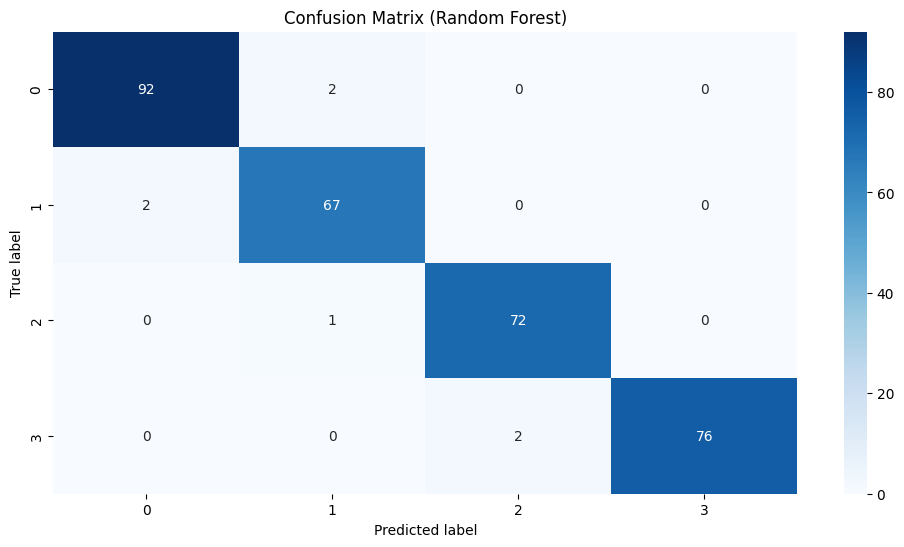

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of random forest results in 307 right predcitions out of 314 datas

In [ ]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)
# Classification report of the random forest
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.96      0.97      0.96        69
           2       0.97      0.99      0.98        73
           3       1.00      0.97      0.99        78

    accuracy                           0.98       314
   macro avg       0.98      0.98      0.98       314
weighted avg       0.98      0.98      0.98       314



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Conclusion from the Classification Report (Random Forest):**
- The Random Forest model achieved a high overall accuracy of 98%. The precision, recall, and F1-scores for all classes are consistently strong, with Class 3 exhibiting the highest performance. The macro and weighted averages reinforce the model's reliability and balanced performance across all classes. Although slightly lower than Logistic Regression, the results indicate that the Random Forest model is highly effective.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42) # Modelling and fitting using gradient boosting classifier with random state = 42
gb.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_gb = gb.predict(X_test_scaled)
y_train_gb = gb.predict(X_train_scaled)

# Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9681528662420382


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Accuracy calculation
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
training_accuracy_gb = accuracy_score(y_train, y_train_gb)

# Printing the results
print(f"Gradient Boosting Testing accuracy: {test_accuracy_gb:.4f}")
print(f"Gradient Boosting Training accuracy: {training_accuracy_gb:.4f}")
# The Gradient Boosting model is overfitting because it achieves perfect training accuracy but fails to generalize perfectly to testing data

Gradient Boosting Testing accuracy: 0.9682
Gradient Boosting Training accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


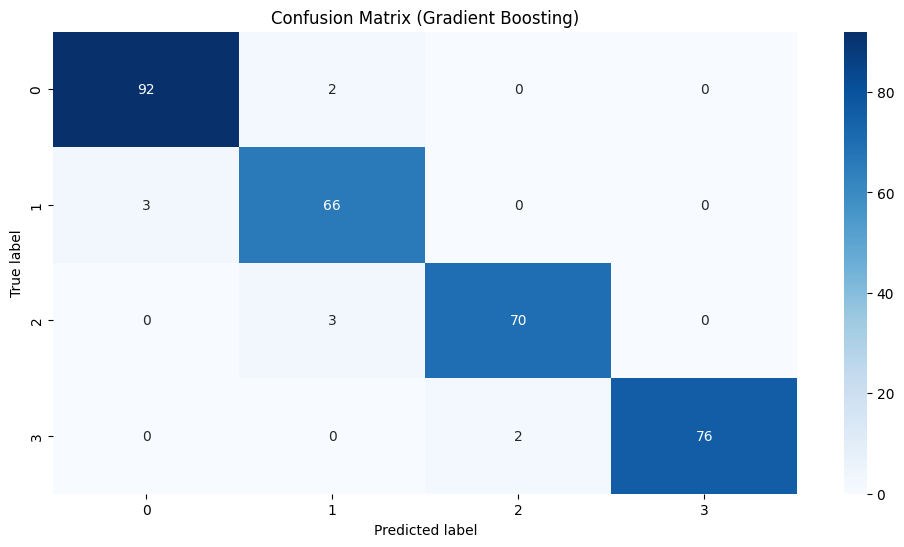

In [ ]:
cm_xg = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(12,6))
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of gradient boosting results in 304 right predcitions out of 314 datas

In [ ]:
class_report_xg = classification_report(y_test, y_pred_gb)

print("Classification Report Gradient Boosting: \n", class_report_xg)
# Classification report of the gradient boosting
# It shows the precision, recall, f1-score, and support values of the model

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.93      0.96      0.94        69
           2       0.97      0.96      0.97        73
           3       1.00      0.97      0.99        78

    accuracy                           0.97       314
   macro avg       0.97      0.97      0.97       314
weighted avg       0.97      0.97      0.97       314



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Conclusion from the Classification Report (Gradient Boosting):**
- The Gradient Boosting model achieved an impressive overall accuracy of 97%. The precision, recall, and F1-scores are consistently high across all classes, with Class 3 showing the best performance. The macro and weighted averages confirm the model's strong and balanced classification ability. While slightly trailing Logistic Regression and Random Forest, Gradient Boosting remains a highly effective and reliable model for this dataset.

**Final Thoughts & Recommendations on Classificiation**
- Logistic Regression appears to be the best-performing model for this dataset. It achieves the highest accuracy (99%) and consistently strong precision, recall, and F1-scores for all classes. Unlike the other models, Logistic Regression demonstrates a well-balanced fit, avoiding overfitting while maintaining high performance.
- The Random Forest and Gradient Boosting models, although achieving strong results, exhibit slightly lower accuracy and could be prone to overfitting given their complexity. Overfitting is especially a concern for Random Forest and Gradient Boosting due to their tendency to adapt closely to the training data, which can lead to less generalization on unseen data.
- Thus, Logistic Regression is likely the most reliable and robust choice, balancing simplicity, performance, and generalizability.

## **2. Clustering**

## K-means Clustering

K-means uses the elbow method and determines the number of clusters to be formed.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


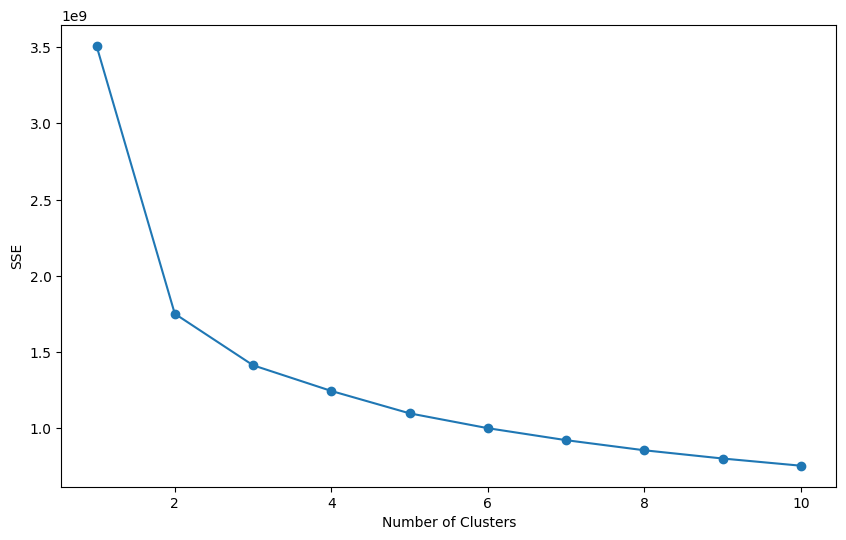

In [ ]:
# K-Means Clustering
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init ='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.show()
# Use 'elbow method' to help determine how many clusters are optimal in order to identify the point where the SSE starts to decrease more slowly
# This point is regarded as the ideal number of clusters, as incorporating additional clusters beyond this stage does not substantially enhance the fit and instead adds complexity

In [ ]:
# Create an instance of KneeLocator to identify the optimal number of clusters
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow

print(f"The best k for your model is : {optimal_k}")
# This algorithm assists in determining the most suitable number of clusters, supporting the earlier statement

The best k for your model is : 4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train the K-Means model on the dataset with the number of clusters we have determined.

In [ ]:
kmeans = KMeans(n_clusters=kl.elbow, init ='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

# Training the KMeans model for clustering with the number of clusters set to 4
# This aims to group the data into distinct clusters or categories

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 0, 0, ..., 0, 2, 0], dtype=int32)

In [ ]:
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)

df_inverse['KMeans'] = y_pred
# Inverse transform the scaled data to get the original values

df_inverse.head(5)
# Show top 5 rows of the data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0,0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0,0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0,0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0,3


In [ ]:
df['KMeans'] = kmeans.labels_
# Now inverse transform the scaled numeric columns to retrieve the original values

df_scaled = scaler.inverse_transform(df_scaled)

# Display the first few rows of the DataFrame to verify the original values for numeric columns
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,3


In [ ]:
# aggregation

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans'] = kmeans.fit_predict(df_scaled)

# Group by Agglomerative Clusters and calculate summary statistics
cluster_summary = df.groupby('KMeans').agg({
    'battery_power': ['mean', 'min', 'max'],
    'blue': ['mean', 'min', 'max'],
    'clock_speed': ['mean', 'min', 'max'],
    'dual_sim': ['mean', 'min', 'max'],
    'fc': ['mean', 'min', 'max'],
    'four_g': ['mean', 'min', 'max'],
    'int_memory': ['mean', 'min', 'max'],
    'm_dep': ['mean', 'min', 'max'],
    'mobile_wt': ['mean', 'min', 'max'],
    'n_cores': ['mean', 'min', 'max'],
    'pc': ['mean', 'min', 'max'],
    'px_height': ['mean', 'min', 'max'],
    'px_width': ['mean', 'min', 'max'],
    'ram': ['mean', 'min', 'max'],
    'sc_h': ['mean', 'min', 'max'],
    'sc_w': ['mean', 'min', 'max'],
    'talk_time': ['mean', 'min', 'max'],
    'three_g': ['mean', 'min', 'max'],
    'touch_screen': ['mean', 'min', 'max'],
    'wifi': ['mean', 'min', 'max'],
})

# Flattening MultiIndex columns for better readability
cluster_summary.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in cluster_summary.columns]

# Transposing the result to swap rows and columns
cluster_summary_transposed = cluster_summary.transpose()

# Displaying the transposed result as a styled DataFrame for better visualization
cluster_summary_styled = cluster_summary_transposed.style.format(precision=2)

# Display the styled DataFrame
cluster_summary_styled

# Transposing the summary for better readability and displaying the transposed cluster summary
# This process generates detailed statistics for each column within each cluster
# It can be used to interpret the characteristics of each cluster, draw conclusions, and subsequently predict the cluster membership of new data points

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans,0,1,2,3
battery_power (mean),1239.23,1232.99,1250.72,1236.30
battery_power (min),501.00,503.00,502.00,501.00
battery_power (max),1994.00,1996.00,1997.00,1998.00
blue (mean),0.52,0.48,0.47,0.50
blue (min),0.00,0.00,0.00,0.00
blue (max),1.00,1.00,1.00,1.00
clock_speed (mean),1.53,1.56,1.46,1.50
clock_speed (min),0.50,0.50,0.50,0.50
clock_speed (max),3.00,3.00,3.00,3.00
dual_sim (mean),0.55,0.48,0.49,0.50


In [ ]:
df['KMeans'].value_counts().sort_index()
# Count data from each cluster to see the distribution of clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
KMeans,
0,548
1,463
2,600
3,389


**K-Means Model Interpretation**
- Cluster 0 (548 data points): Represents mid-range smartphones that offer a balanced performance with decent processing power, ample RAM, and good battery life, making them ideal for users seeking reliable devices for daily tasks without premium pricing. These phones typically support 4G, dual SIM, and feature satisfactory screen sizes and camera quality.
- Cluster 1 (463 data points): Represents budget-friendly smartphones designed for users who prioritize affordability and basic functionality. With moderate processing power, lower RAM, and simpler features, these devices cater to users who need a functional phone for lighter tasks like messaging and social media, offering essential features at a cost-effective price.
- Cluster 2 (600 data points):  Offers devices that strike a balance between affordability and performance. These phones are equipped with decent specifications, providing enough power for day-to-day tasks with better multitasking capabilities than the budget phones, making them suitable for users seeking functionality at a reasonable price.
- Cluster 3 (389 data points): Represents phones that prioritize performance, offering more processing power, better multitasking ability, and higher RAM. These smartphones are ideal for users who require efficient devices for both regular and moderate gaming or multitasking, combining a good balance of price and performance.

## Hierarchical Clustering

Hierarchical clustering uses the agglomerative method.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


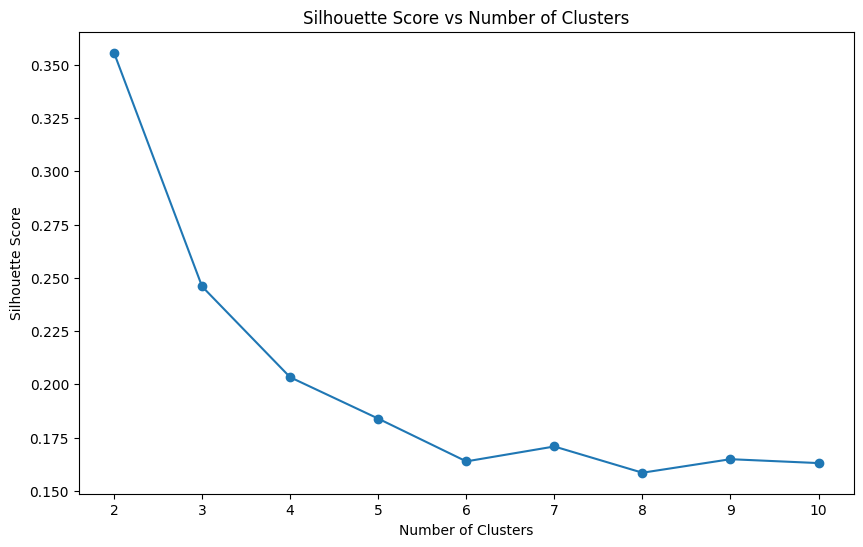

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)
# Calculate silhouette scores for different numbers of clusters using Agglomerative Clustering

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(df_scaled)
    # Loop through the range of cluster numbers to calculate silhouette scores

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # Calculate the silhouette score for the current number of clusters

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
# Plotting the silhouette scores against the number of clusters

In [ ]:
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nThe best number of clusters is: {best_k}")
# Determine the best number of clusters based on the highest silhouette score

# This process helps identify the optimal number of clusters by evaluating how well-separated the clusters are
# A higher silhouette score indicates better-defined clusters, assisting in making an informed decision for clustering


The best number of clusters is: 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# agglomerative clustering

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = hc.fit_predict(df_scaled)
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
df['AgglomerativeCluster'] = y_pred
# Adding the cluster labels to the original data that we have been added with kmeans so we have a full dataframe include kmeans and agglo clustering

df.head()
# Show top 5 rows of the data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans,AgglomerativeCluster
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1,2,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1,1,1


In [ ]:
# aggregation

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
df['AgglomerativeCluster'] = agglo.fit_predict(df_scaled)

# Group by Agglomerative Clusters and calculate summary statistics
cluster_summary = df.groupby('AgglomerativeCluster').agg({
    'battery_power': ['mean', 'min', 'max'],
    'blue': ['mean', 'min', 'max'],
    'clock_speed': ['mean', 'min', 'max'],
    'dual_sim': ['mean', 'min', 'max'],
    'fc': ['mean', 'min', 'max'],
    'four_g': ['mean', 'min', 'max'],
    'int_memory': ['mean', 'min', 'max'],
    'm_dep': ['mean', 'min', 'max'],
    'mobile_wt': ['mean', 'min', 'max'],
    'n_cores': ['mean', 'min', 'max'],
    'pc': ['mean', 'min', 'max'],
    'px_height': ['mean', 'min', 'max'],
    'px_width': ['mean', 'min', 'max'],
    'ram': ['mean', 'min', 'max'],
    'sc_h': ['mean', 'min', 'max'],
    'sc_w': ['mean', 'min', 'max'],
    'talk_time': ['mean', 'min', 'max'],
    'three_g': ['mean', 'min', 'max'],
    'touch_screen': ['mean', 'min', 'max'],
    'wifi': ['mean', 'min', 'max'],
})

# Flattening MultiIndex columns for better readability
cluster_summary.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in cluster_summary.columns]

# Transposing the result to swap rows and columns
cluster_summary_transposed = cluster_summary.transpose()

# Displaying the transposed result as a styled DataFrame for better visualization
cluster_summary_styled = cluster_summary_transposed.style.format(precision=2)

# Display the styled DataFrame
cluster_summary_styled

# Transposing the summary for better readability and displaying the transposed cluster summary
# This process generates detailed statistics for each column within each cluster
# It can be used to interpret the characteristics of each cluster, draw conclusions, and subsequently predict the cluster membership of new data points

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AgglomerativeCluster,0,1
battery_power (mean),1206.22,1294.35
battery_power (min),501.00,503.00
battery_power (max),1998.00,1996.00
blue (mean),0.50,0.48
blue (min),0.00,0.00
blue (max),1.00,1.00
clock_speed (mean),1.53,1.51
clock_speed (min),0.50,0.50
clock_speed (max),3.00,3.00
dual_sim (mean),0.51,0.50


In [ ]:
df['AgglomerativeCluster'].value_counts().sort_index()
# Count data from each cluster to see the distribution of clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
AgglomerativeCluster,
0,1267
1,733


**Hierarchical Model Interpretation**
- Cluster 0 (1267 data points): devices target users who demand high performance, robust features, and an overall seamless user experience, making them ideal for power users who are into gaming, media, and productivity.
- Cluster 1 (733 data points): smartphones are targeted at budget-conscious users who require a phone for basic communication, social media, and occasional entertainment, without the need for high-end performance features.

**Final Thoughts & Recommendations on Clustering**

- The segmentation shows a diverse market with significant demand in the mid-range (Clusters 0 and 2 in K-means). Manufacturers should focus on innovation and competitive pricing here.
- Premium and budget markets are clearly defined, requiring distinct product development and marketing strategies.
- Companies can use this analysis to refine their portfolios, ensuring their products align with identified clusters, and track shifts in consumer preferences over time.

In [ ]:
# Loop for determining the optimal number of clusters using silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    # Trying all cluster counts from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    # df_scaled = preprocessed dataset
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"Total Clusters: {k}, Silhouette Score: {score}")

# A higher silhouette score means better-defined clusters
# Although the silhouette score decreases as the number of clusters increases, the score for 2 clusters is the highest among all options, indicating that the clustering structure is most meaningful with 2 clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total Clusters: 2, Silhouette Score: 0.4012285898271234
Total Clusters: 3, Silhouette Score: 0.2775539635965582
Total Clusters: 4, Silhouette Score: 0.26207818899114865
Total Clusters: 5, Silhouette Score: 0.2421933337872067
Total Clusters: 6, Silhouette Score: 0.23545057121398177
Total Clusters: 7, Silhouette Score: 0.22705888681328026
Total Clusters: 8, Silhouette Score: 0.22072575707688688
Total Clusters: 9, Silhouette Score: 0.2260951715252185


## Hierarchical Visualization

Single Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


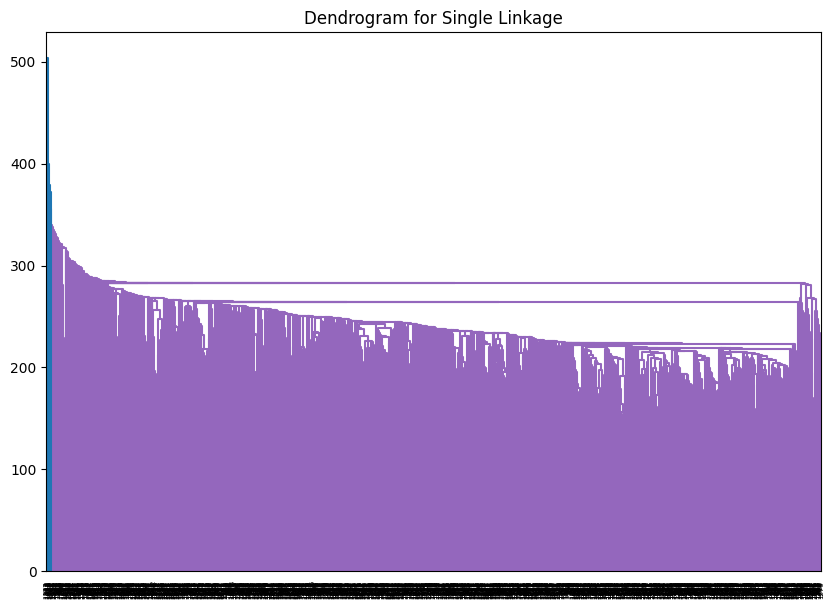

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))

plt.show()

Complete Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


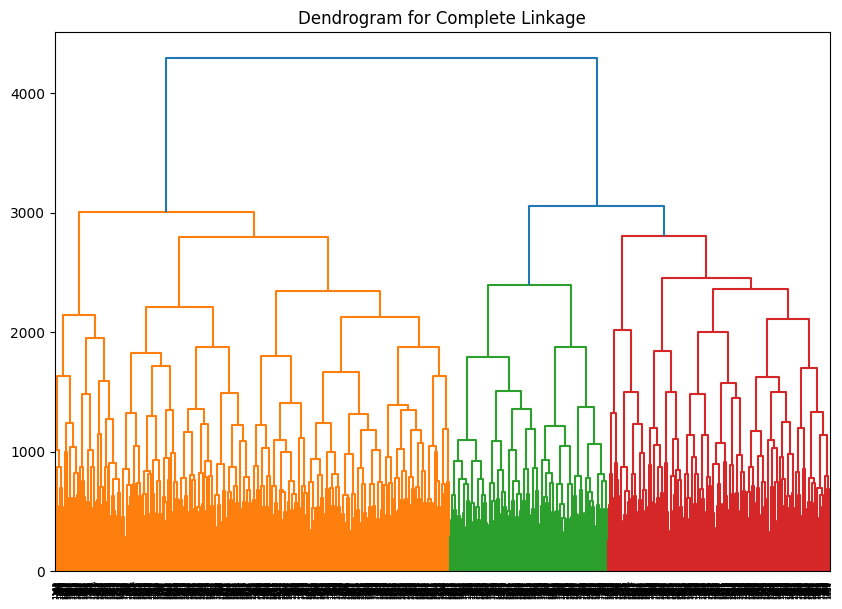

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))

plt.show()

Average Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


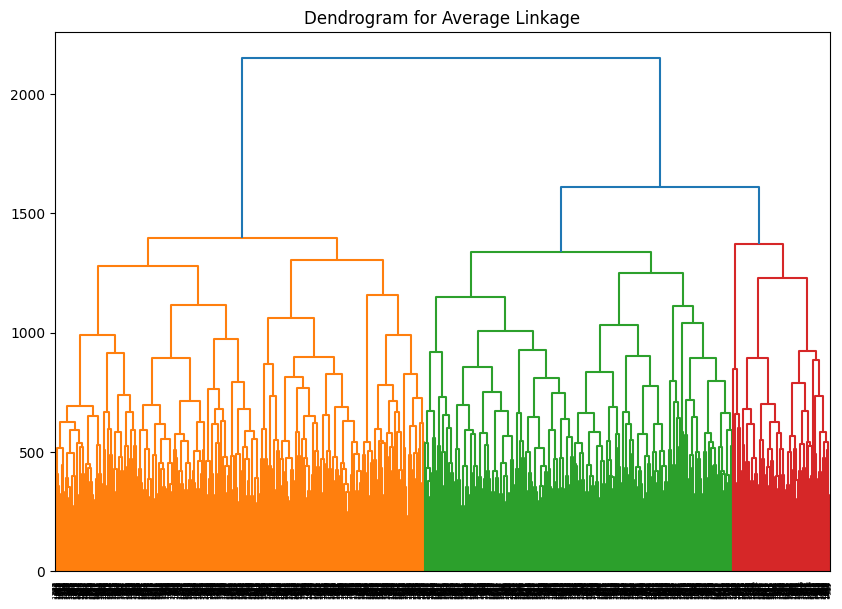

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Average Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))

plt.show()

WARD Method

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


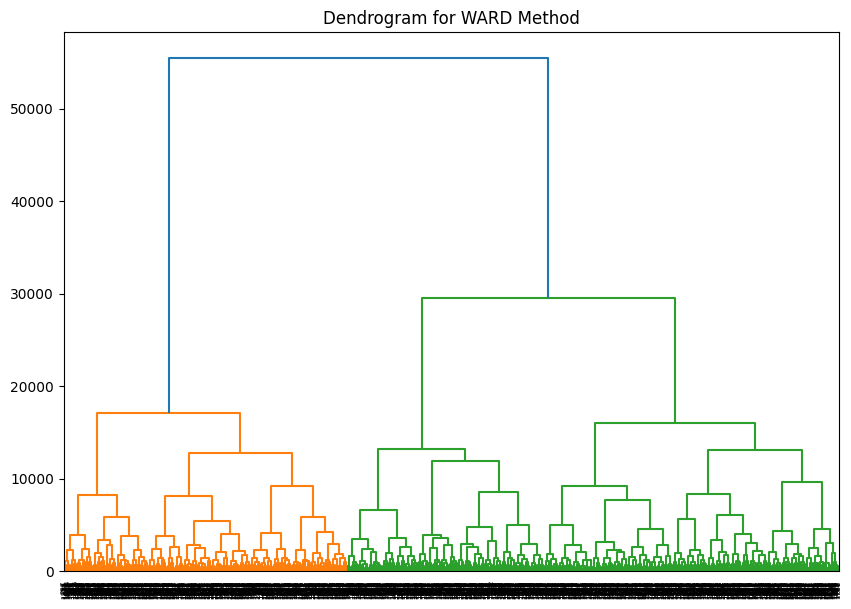

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for WARD Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

plt.show()